# Proyecto #1

## Course: Data science in Python
## Name: Otto Chamo
## Carnet: 19001395
## Sección: V


# Importing libraries

In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import utility_functions as ufs
from correlation_plot_args import CorrelationPlotArgs


# Loading dataset

In [3]:
dataset = pd.DataFrame(np.load('./data/proyecto_training_data.npy'))

dataset.head()

,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [4]:
dataset.isnull().sum()

0      0
1      0
2      0
3      0
4      0
5    259
dtype: int64

# The project

### Renaming columns to their descriptive names provided in <code>data/Data fields.txt</code>

In [5]:
SALE_PRICE_COL = "SalePrice"
OVERALL_QUAL_COL = "OverallQual"
FIRST_FLOOR_SF_COL = "1stFlrSF"
TOTAL_ROOMS_ABOVE_GRADE_COL = "TotRmsAbvGrd"
YEAR_BUILT_COL = "YearBuilt"
LOT_FRONTAGE_COL = "LotFrontage"


In [6]:
dataset = dataset.rename(columns={
    0: SALE_PRICE_COL,
    1: OVERALL_QUAL_COL,
    2: FIRST_FLOOR_SF_COL,
    3: TOTAL_ROOMS_ABOVE_GRADE_COL,
    4: YEAR_BUILT_COL,
    5: LOT_FRONTAGE_COL
})

dataset.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


## Dataset dimension

In [7]:
dataset.shape

(1460, 6)

## Dataset data types

In [8]:
dataset.dtypes

SalePrice       float64
OverallQual     float64
1stFlrSF        float64
TotRmsAbvGrd    float64
YearBuilt       float64
LotFrontage     float64
dtype: object

We want to predict the SalePrice so we take that as our dependent variable $(y)$
and we remove it from the dataset

In [9]:
salePriceColumn = dataset.SalePrice

datasetToWork = dataset.copy().drop(SALE_PRICE_COL, axis=1)

datasetToWork

,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,7.0,856.0,8.0,2003.0,65.0
1,6.0,1262.0,6.0,1976.0,80.0
2,7.0,920.0,6.0,2001.0,68.0
3,7.0,961.0,7.0,1915.0,60.0
4,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...
1455,6.0,953.0,7.0,1999.0,62.0
1456,6.0,2073.0,7.0,1978.0,85.0
1457,7.0,1188.0,9.0,1941.0,66.0
1458,5.0,1078.0,5.0,1950.0,68.0


## 2. Splitting in 80% and 20% for validation and testing

In [10]:
dataset_train, dataset_test, salesColumn_train, salesColumn_test = train_test_split(datasetToWork, salePriceColumn, test_size=0.2)

## 3. Exploring some values of the dataset and calculating range

In [11]:
datasetTrainDescription: pd.DataFrame = dataset_train.describe()

datasetTrainDescription

,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,958.00000
mean,6.091610,1149.587329,6.508562,1970.549658,70.30167
std,1.383957,382.774240,1.640823,30.806986,25.05688
min,1.000000,334.000000,2.000000,1872.000000,21.00000
25%,5.000000,864.000000,5.000000,1952.000000,59.00000
50%,6.000000,1071.500000,6.000000,1972.000000,69.00000
75%,7.000000,1378.750000,7.000000,2000.000000,80.00000
max,10.000000,4692.000000,14.000000,2009.000000,313.00000


In [12]:
rangeOverallQuality = ufs.calculateRangeForColumn(datasetTrainDescription, OVERALL_QUAL_COL)
range1sfFloor = ufs.calculateRangeForColumn(datasetTrainDescription, FIRST_FLOOR_SF_COL)
rangeTotRms = ufs.calculateRangeForColumn(datasetTrainDescription, TOTAL_ROOMS_ABOVE_GRADE_COL)
rangeYearBuilt = ufs.calculateRangeForColumn(datasetTrainDescription, YEAR_BUILT_COL)
rangeLotFrontage = ufs.calculateRangeForColumn(datasetTrainDescription, LOT_FRONTAGE_COL)
print(f"rangeOverallQuality: {rangeOverallQuality}")
print(f"range1sfFloor: {range1sfFloor}")
print(f"rangeTotRms: {rangeTotRms}")
print(f"rangeYearBuilt: {rangeYearBuilt}")
print(f"rangeLotFrontage: {rangeLotFrontage}")
# updating dataset description to include range
newRow = [rangeOverallQuality, range1sfFloor, rangeTotRms, rangeYearBuilt, rangeLotFrontage]
newRowDf = pd.DataFrame([newRow], index=['Range'], columns=dataset_train.columns)
datasetTrainDescription = pd.concat([datasetTrainDescription, newRowDf])

datasetTrainDescription

rangeOverallQuality: 9.0
range1sfFloor: 4358.0
rangeTotRms: 12.0
rangeYearBuilt: 137.0
rangeLotFrontage: 292.0


,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,958.00000
mean,6.091610,1149.587329,6.508562,1970.549658,70.30167
std,1.383957,382.774240,1.640823,30.806986,25.05688
min,1.000000,334.000000,2.000000,1872.000000,21.00000
25%,5.000000,864.000000,5.000000,1952.000000,59.00000
50%,6.000000,1071.500000,6.000000,1972.000000,69.00000
75%,7.000000,1378.750000,7.000000,2000.000000,80.00000
max,10.000000,4692.000000,14.000000,2009.000000,313.00000
Range,9.000000,4358.000000,12.000000,137.000000,292.00000


## 4. Ploting an histogram for each variable

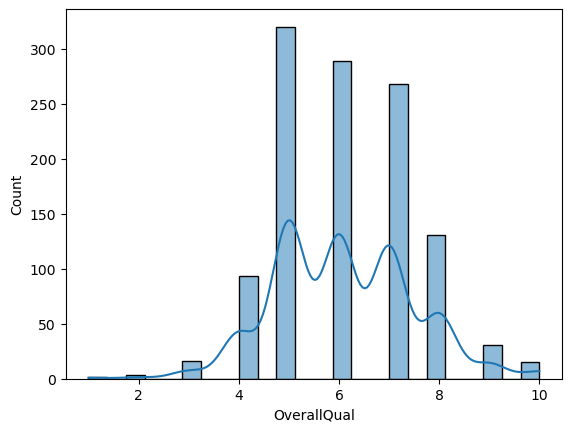

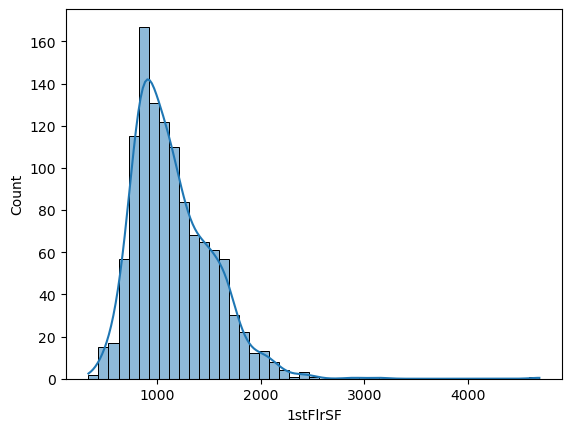

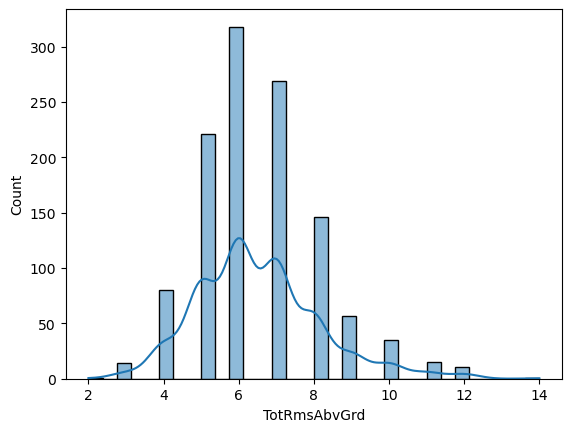

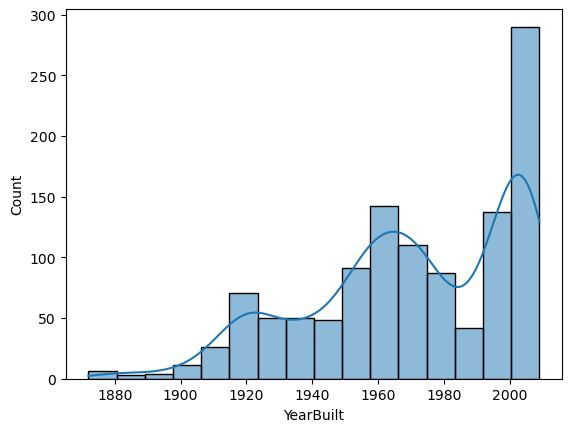

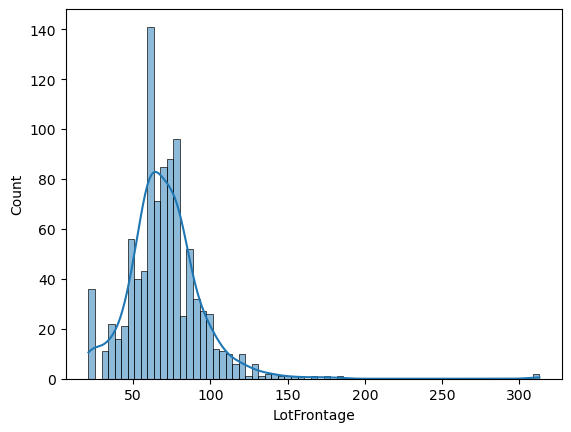

In [13]:
ufs.plot_columns(dataset_train)

## Calculating correlation coefficient of each independent variable.

The Equation for this coefficient is the following

$$
    r = \frac{\sum x_iy_i}{\sqrt{(\sum x_i^2)(\sum y_i^2)}}
$$

Where $x_i = (x_i - \overline{x})$ and $y_i = (y_i - \overline{y})$


### 5.1 Calculating correlation values between variables

In [14]:
corrOverallQual = ufs.calculateCorrelation(dataset_train[OVERALL_QUAL_COL], salesColumn_train)
corrFirstFloor = ufs.calculateCorrelation(dataset_train[FIRST_FLOOR_SF_COL], salesColumn_train)
corrTotalRooms = ufs.calculateCorrelation(dataset_train[TOTAL_ROOMS_ABOVE_GRADE_COL], salesColumn_train)
corrYearBuilt = ufs.calculateCorrelation(dataset_train[YEAR_BUILT_COL], salesColumn_train)
corrLotFrontage = ufs.calculateCorrelation(dataset_train[LOT_FRONTAGE_COL], salesColumn_train)

ufs.printCorrelation(OVERALL_QUAL_COL, corrOverallQual[0, 1])
ufs.printCorrelation(FIRST_FLOOR_SF_COL, corrFirstFloor[0, 1])
ufs.printCorrelation(TOTAL_ROOMS_ABOVE_GRADE_COL, corrTotalRooms[0, 1])
ufs.printCorrelation(YEAR_BUILT_COL, corrYearBuilt[0, 1])
ufs.printCorrelation(LOT_FRONTAGE_COL, corrLotFrontage[0, 1])


Correlation for OverallQual = 0.7803
Correlation for 1stFlrSF = 0.5900
Correlation for TotRmsAbvGrd = 0.5395
Correlation for YearBuilt = 0.5147
Correlation for LotFrontage = nan


### 5.2 Plot Scatter plot for each variable using matplotlib.
### Chooose two that have the greater correlation coefficient.

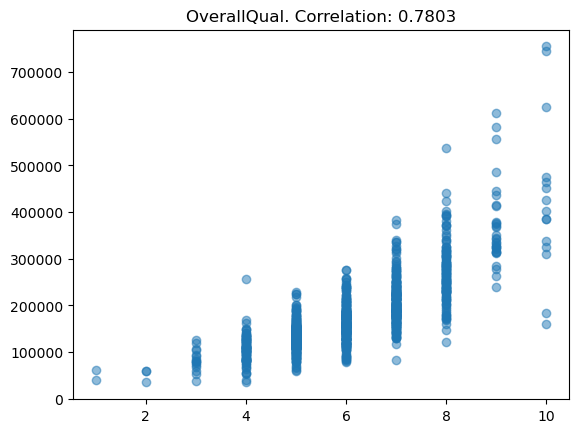

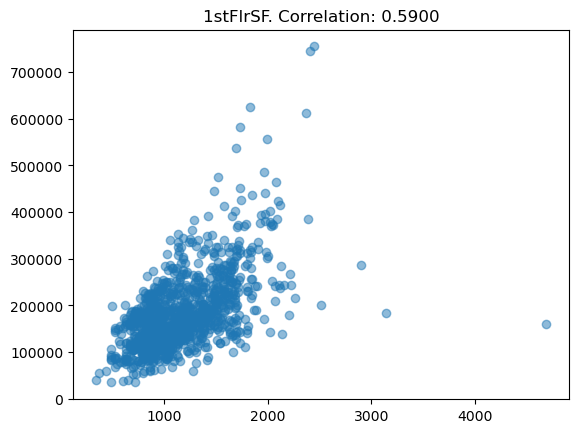

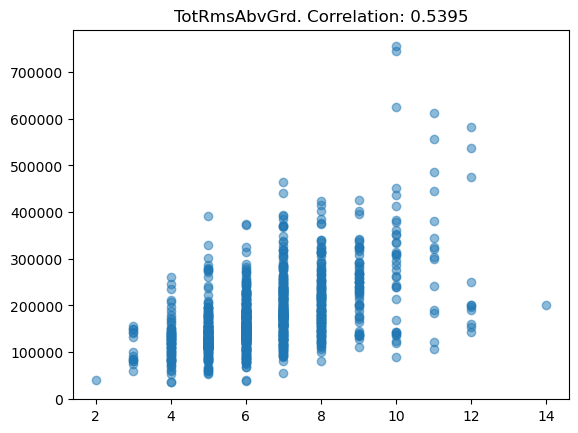

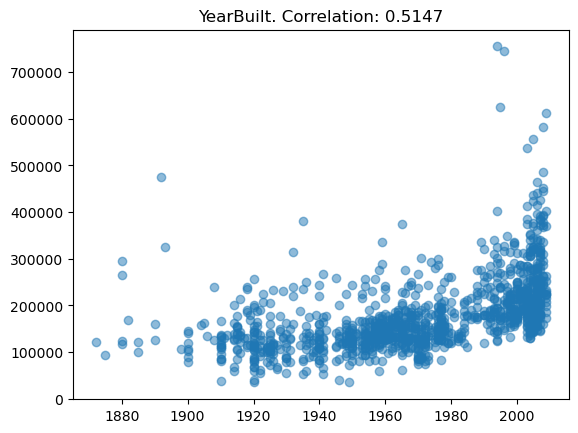

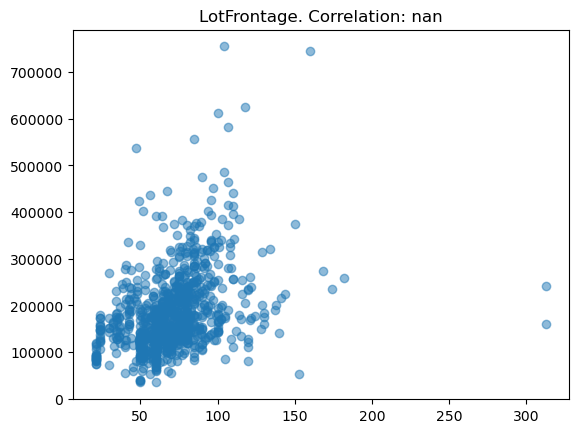

In [15]:
args = CorrelationPlotArgs(
    x = dataset_train[OVERALL_QUAL_COL],
    y = salesColumn_train,
    correlation= corrOverallQual[0, 1],
    title=OVERALL_QUAL_COL
)
ufs.plotScatterPlot(args)

args = CorrelationPlotArgs(
    x = dataset_train[FIRST_FLOOR_SF_COL],
    y = salesColumn_train,
    correlation= corrFirstFloor[0, 1],
    title=FIRST_FLOOR_SF_COL
)
ufs.plotScatterPlot(args)

args = CorrelationPlotArgs(
    x = dataset_train[TOTAL_ROOMS_ABOVE_GRADE_COL],
    y = salesColumn_train,
    correlation=corrTotalRooms[0, 1],
    title=TOTAL_ROOMS_ABOVE_GRADE_COL
)
ufs.plotScatterPlot(args)

args = CorrelationPlotArgs(
    x = dataset_train[YEAR_BUILT_COL],
    y = salesColumn_train,
    correlation=corrYearBuilt[0, 1],
    title=YEAR_BUILT_COL
)
ufs.plotScatterPlot(args)

args = CorrelationPlotArgs(
    x = dataset_train[LOT_FRONTAGE_COL],
    y = salesColumn_train,
    correlation=corrLotFrontage[0, 1],
    title=LOT_FRONTAGE_COL
)
ufs.plotScatterPlot(args)

The variables we are gonna pick are OverrallQual and 1stFlrSF

## Creating a function to train a model of lineal regression with one variable
$$y = \beta_0 + \beta_1x $$

In [16]:
def train_model(x, y, epochs: int, imprimir_error_cada: int, learning_rate: float):
    pass


### 

## Sources?

https://vitalflux.com/pearson-correlation-coefficient-statistical-significance/